  # Python for Data Science Bootcamp
  ## Review Data Munging and Matplotlib

Import the yelp_reviews_sample.csv file as a Dataframe

In [341]:
import pandas as pd

In [342]:
data = pd.read_csv('yelp_reviews_sample.csv',encoding='latin1')
data.head()

,business_name,review_id,user_id,stars,review_date,review_text,funny,useful,cool
0,Thai Pan Fresh Exotic Cuisine,0ESSqLfOae77muWTv_zUqA,r-t7IiTSD0QZdt8lOUCqeQ,3,2011-02-11,Lately i have been feeling homesick for asian ...,1,1,1
1,Salon Lola,VyAKIaj_Rmsf_ZCHcGJyUw,SS85hfTApRnbTPcJadra8A,5,2010-05-30,I love Marilo! She understands my hair type a...,0,0,0
2,Chipotle Mexican Grill,DusrkpkTGPGkqK13xO1TZg,xAVu2pZ6nIvkdHh8vGs84Q,3,2011-11-26,Standard Chipotle fare - consistently good; no...,0,0,0
3,Sam's Deli,A5FL-YYXnr2hnvXQbgkkrQ,Xuvj2Fq6c3mCmplVG7h21w,4,2013-10-10,Very good prices with quality ingredients.,0,0,0
4,Petco,SzhIWfzLHUZfiAaVTtKHxw,jHH_UDpCnF-YTnveyoMTIA,1,2012-09-02,I went to this Petco a few times and was a bit...,0,1,0


Investigate the data and see if anything needs cleaning.  Hint: Check the unique values and value_counts for stars column.

In [343]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16390 entries, 0 to 16389
Data columns (total 9 columns):
business_name    16390 non-null object
review_id        16390 non-null object
user_id          16390 non-null object
stars            16390 non-null object
review_date      16390 non-null object
review_text      16390 non-null object
funny            16390 non-null int64
useful           16390 non-null int64
cool             16390 non-null int64
dtypes: int64(3), object(6)
memory usage: 1.1+ MB


In [344]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
funny,16390.0,0.607200,1.773961,0.0,0.0,0.0,1.0,70.0
useful,16390.0,1.251190,2.084710,0.0,0.0,1.0,2.0,38.0
cool,16390.0,0.764185,1.784975,0.0,0.0,0.0,1.0,36.0


In [345]:
data.stars.unique()

array(['3', '5', '4', '1', '2', '?'], dtype=object)

In [346]:
data.stars.value_counts()

5    5842
4    5371
3    2334
2    1481
1    1348
?      14
Name: stars, dtype: int64

Clean the data by removing the reviews with '?' for stars rating

In [347]:
data = data[data.stars != '?']
data.stars.unique()

array(['3', '5', '4', '1', '2'], dtype=object)

Replace the stars values that are text with integers

In [348]:
# MANUAL STRATEGY FOR REPLACING VALUES
# mapping = {'1': 1, '2': 2, '3': 3, '4': 4, '5': 5}
# data.replace({'stars': mapping}, inplace=True)

# MORE SCALABLE STRATEGIES FOR REPLACING DATA
# data.stars = data.stars.astype(int)
# data.stars = data.stars.apply(int)
data.stars = pd.to_numeric(data.stars, errors='coerce') # invalid parsing will be set as NaN
data.stars.unique()

# NOTE: .fillNA or .dropna could be used to fill null values AFTER you run .to_numeric with 'coerce'

array([3, 5, 4, 1, 2])

In [349]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16376 entries, 0 to 16389
Data columns (total 9 columns):
business_name    16376 non-null object
review_id        16376 non-null object
user_id          16376 non-null object
stars            16376 non-null int64
review_date      16376 non-null object
review_text      16376 non-null object
funny            16376 non-null int64
useful           16376 non-null int64
cool             16376 non-null int64
dtypes: int64(4), object(5)
memory usage: 1.2+ MB


In [350]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
stars,16376.0,3.786395,1.247527,1.0,3.0,4.0,5.0,5.0
funny,16376.0,0.607169,1.774147,0.0,0.0,0.0,1.0,70.0
useful,16376.0,1.250916,2.084798,0.0,0.0,1.0,2.0,38.0
cool,16376.0,0.764045,1.784997,0.0,0.0,0.0,1.0,36.0


How many 5 star reviews does Lo-Lo's Chicken & Waffles have?

In [351]:
five_star_rows = data[(data.business_name == "Lo-Lo's Chicken & Waffles") & (data.stars == 5)]
five_star_rows.count().business_name

20

In [352]:
# OR
data[(data.business_name == "Lo-Lo's Chicken & Waffles")].stars.value_counts()[5]

20

In [353]:
# To find columns by query string
data[data.business_name.str.contains("Lo-Lo")]

,business_name,review_id,user_id,stars,review_date,review_text,funny,useful,cool
142,Lo-Lo's Chicken & Waffles,hTG8PCw-uQ8DERkoXRinQw,tdNV2Wb0LrFpm1Yfov_Klw,5,2009-08-29,"In order to arrange a upcoming UYE ""Butter Par...",9,11,8
214,Lo-Lo's Chicken & Waffles,hpJdH7BS0iWURz9KNijYBg,am9yAm4Ph7yk81sFkHlxig,5,2010-03-08,I have been a patron of the original Lolo's fo...,1,1,1
954,Lo-Lo's Chicken & Waffles,0ZUhLKDf9_X3XcCqEpeFuQ,hVMdwvAgxH_WYWYYsL4kkQ,4,2012-04-09,Looking for a place in Phoenix to get some ear...,0,1,1
984,Lo-Lo's Chicken & Waffles,S3w8ilunLH-J1yDK836B1w,-q0RFaCkmT6TFxgk0a9dPw,4,2011-11-12,We live close to Lolo's and I have been meanin...,0,0,0
1318,Lo-Lo's Chicken & Waffles,fZgUCgPo6JxjrPfQJh5o-A,q0QqYnm53S6Wm04TFAvIlQ,3,2013-09-27,"First time at this location, we always dine in...",0,1,2
1373,Lo-Lo's Chicken & Waffles,OW2Pj5-ExHxuFoCQtRfIsw,yNVGe_z9hHxbvpa2Ns2JIg,5,2009-09-22,I have had chicken. I have had waffles. And no...,23,17,19
1390,Lo-Lo's Chicken & Waffles,epLQoUN5WnDQIZ3dp5lqAA,du6KeE54IFbPiXpU3LOd1g,4,2009-05-01,It's easy to like the things that everybody el...,11,11,12
3784,Lo-Lo's Chicken & Waffles,G91hx5TziGyFTtiqc2Tl-g,GnzT9CF-S-rZ3M09H2fchw,1,2014-01-11,3rd stike..... I will never return to this loc...,0,4,0
4049,Lo-Lo's Chicken & Waffles,xEhB7fXEb0MTvEThGUIDgQ,F2bm-RcEaxqIqriybDgpXQ,2,2010-12-24,"Fried chicken was good, but everything else wa...",0,1,0
4810,Lo-Lo's Chicken & Waffles,NcVv3Pd6QpLzSIZ2PBKm_g,4UeAJwGEEVA6qJ85b5ib4Q,5,2012-03-16,I grew up in the South eating copious amounts ...,0,0,0


What's the most number of cool votes a review received?

In [354]:
max_cool = data.cool.max()
data[data.cool == max_cool]

,business_name,review_id,user_id,stars,review_date,review_text,funny,useful,cool
4555,Rainforest Cafe,2FgG1U24AH0KLBj4l16bLg,C8ZTiwa7qWoPSMIivTeSfw,1,2008-02-28,I would rather be a freegan and dumpster dive ...,70,28,36
10490,Dyno Comp,x-aZ1ccyXTnQFzgGLTNI4A,qrVKWrW2N7-Wn1Jgxg5j6w,5,2010-11-23,Best shop in town.\rEvery employee at Dyno-Com...,0,38,36


Which business has the most reviews? (hint: use .value_counts())

In [397]:
review_counts = data.business_name.value_counts() # will make business_name the index
# review_counts.index[0]

# REFORMATTING so business_name is a column, not an index
new_df = pd.DataFrame(review_counts)
new_df.reset_index()['index'][0]

'Pita Jungle'

In [394]:
data_df = data.groupby('business_name')[['review_id']].count()
data_df = data_df.sort_values('review_id', ascending=False)

data_df.reset_index().business_name[0]

'Pita Jungle'

Create a scatter plot of the average star rating vs. average cool review per business (Hint: Use groupby to get the data)

In [307]:
chart_data = data.groupby('business_name')['stars','cool'].mean()

In [308]:
import matplotlib.pyplot as plt
%matplotlib inline

/anaconda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


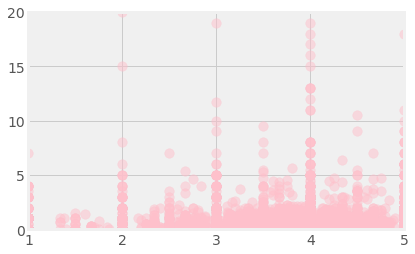

In [309]:
canvas = plt.figure()
plt.style.use('fivethirtyeight')
plt.ylim([0,20])
plt.xlim([1,5])
plt.xticks(range(1,6))
first_graph = canvas.add_subplot(111)
first_graph.scatter(chart_data.stars, chart_data.cool, s=90, color='pink', alpha='0.5')

Bonus:  Change the marker size and transparency in the plot